### Pupil Field (Wavefront) Calculation

This notebook demonstrates how to calculate the pupil field (wavefront) of a lens for a point object in space using coherent ray tracing.

**Note:** Wavefront error is the relative error between the actual wavefront and the ideal spherical wavefront. In commercial software (e.g., Zemax), wavefront error is calculated by interpolation, which requires a low-frequency wavefront aberration. While in DeepLens, we do not rely on interpolation and the calculation is also accurate for high-frequency wavefront.

**Technical Paper:**
> Xinge Yang, Matheus Souza, Kunyi Wang, Praneeth Chakravarthula, Qiang Fu and Wolfgang Heidrich, "End-to-End Hybrid Refractive-Diffractive Lens Design with Differentiable Ray-Wave Model," Siggraph Asia 2024.


#### Import Libraries


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

import torch
from deeplens import GeoLens


#### Load Lens and Set Sensor Resolution

We'll load a cellphone lens and set a high sensor resolution. **Note:** Better to use a high sensor resolution (4000x4000 is roughly acceptable, but higher is better) for accurate wavefront calculation.


Using CUDA: NVIDIA A100 80GB PCIe
Set torch.float64 as default torch dtype.


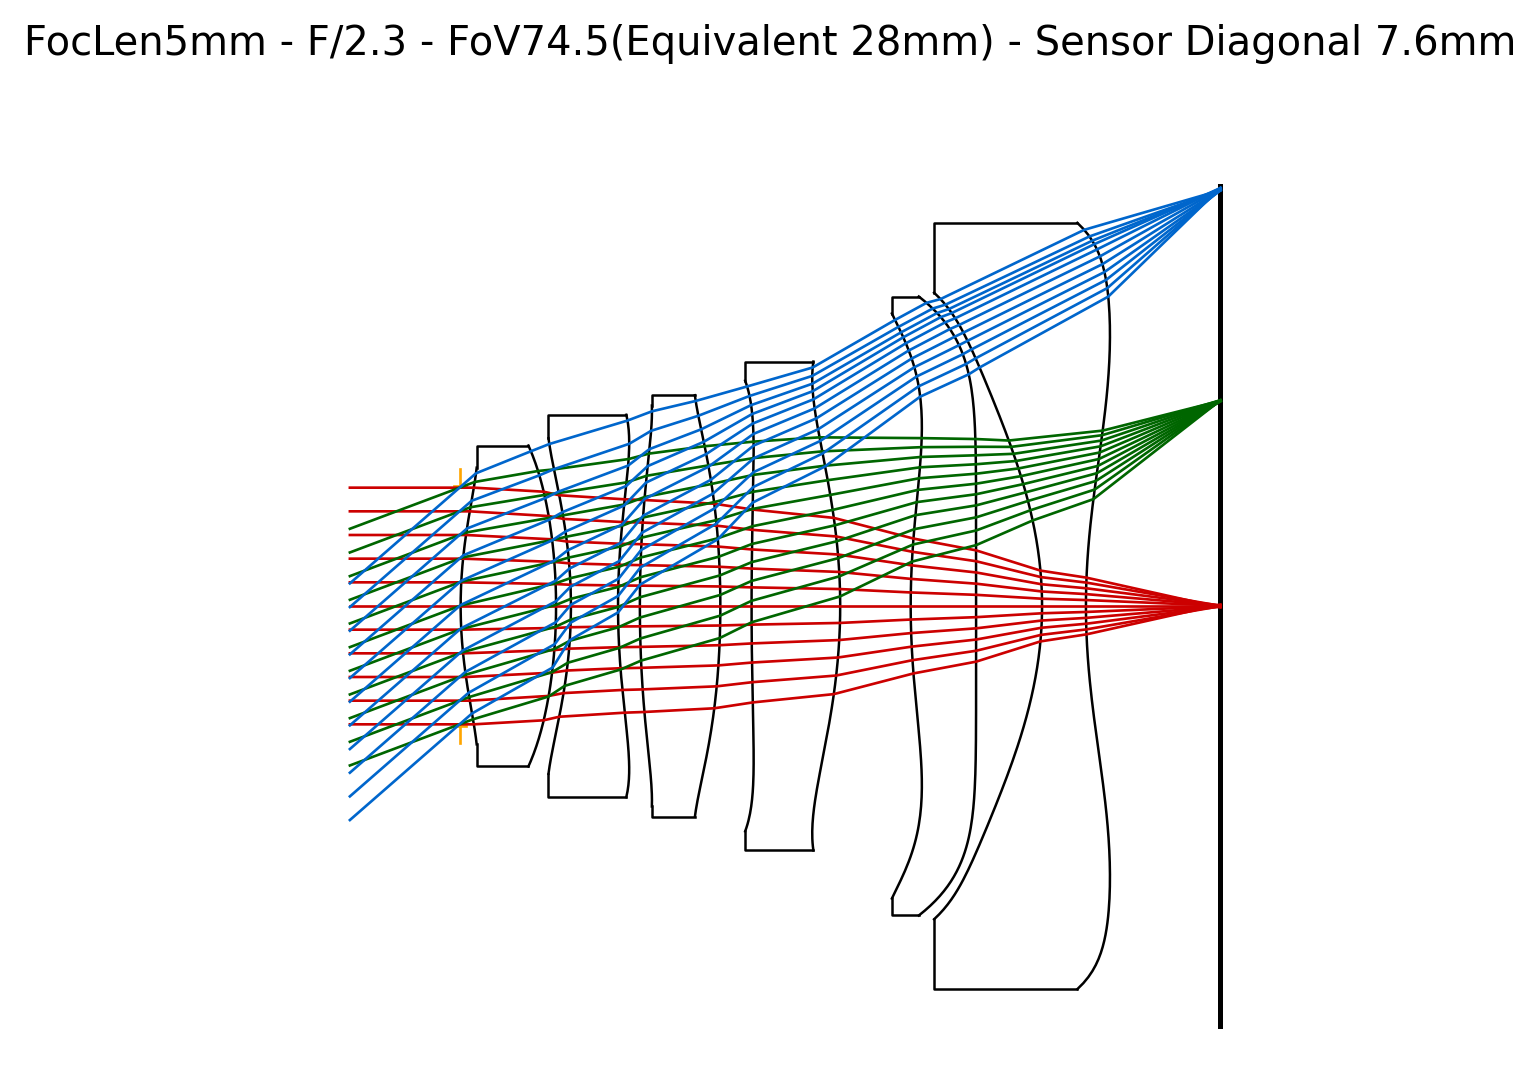

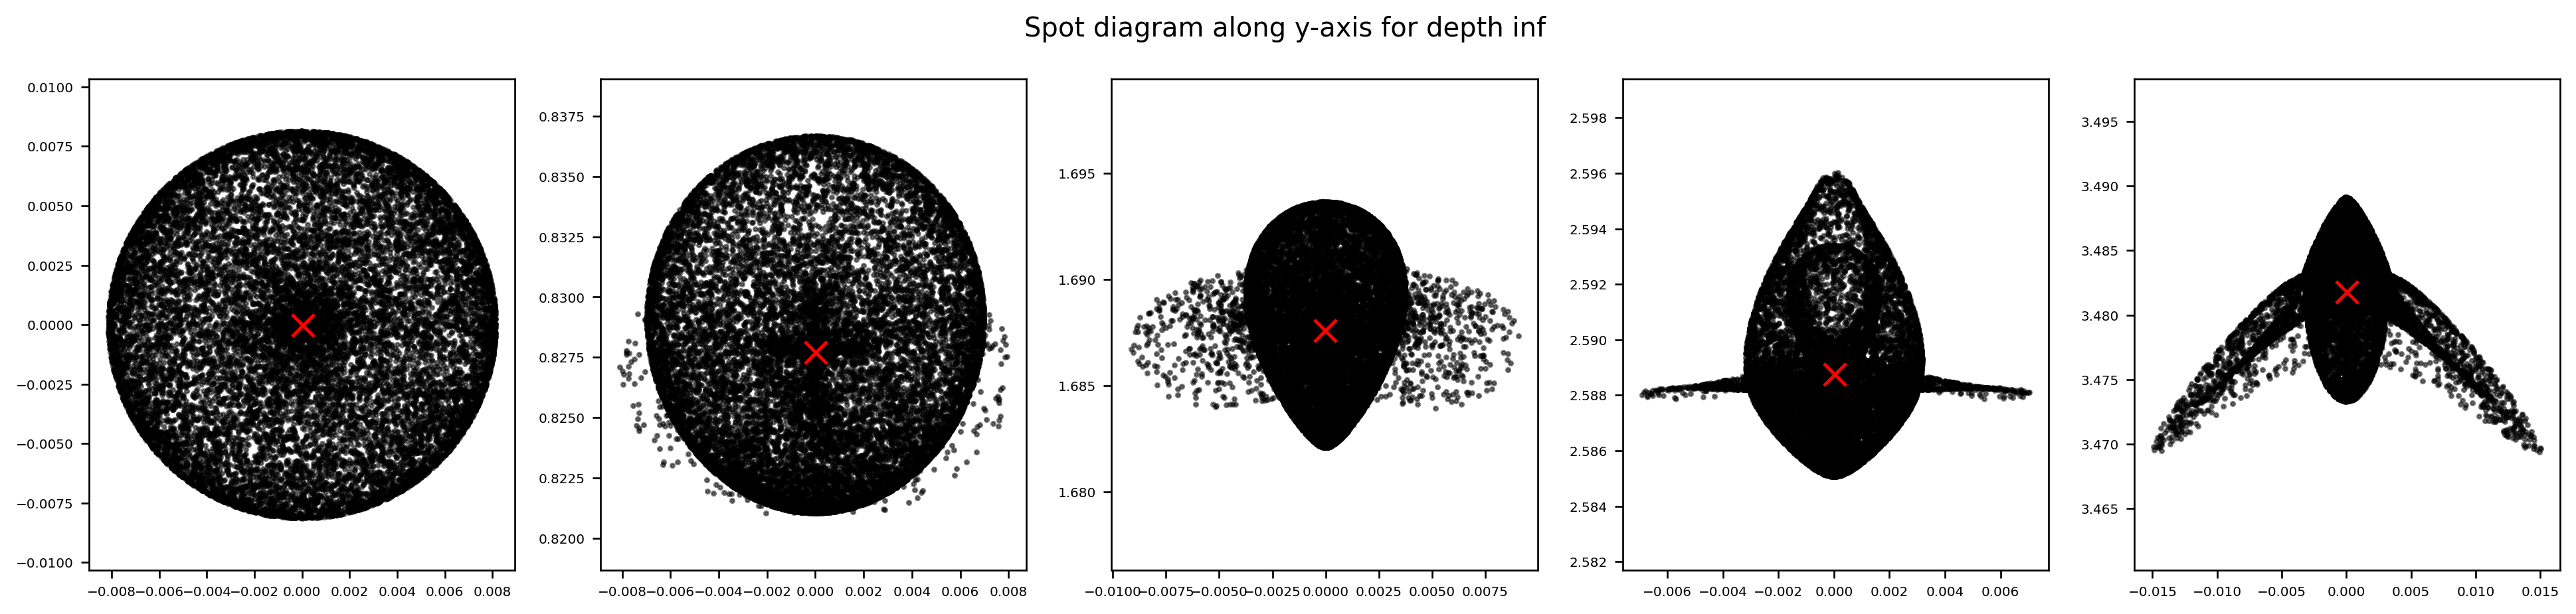

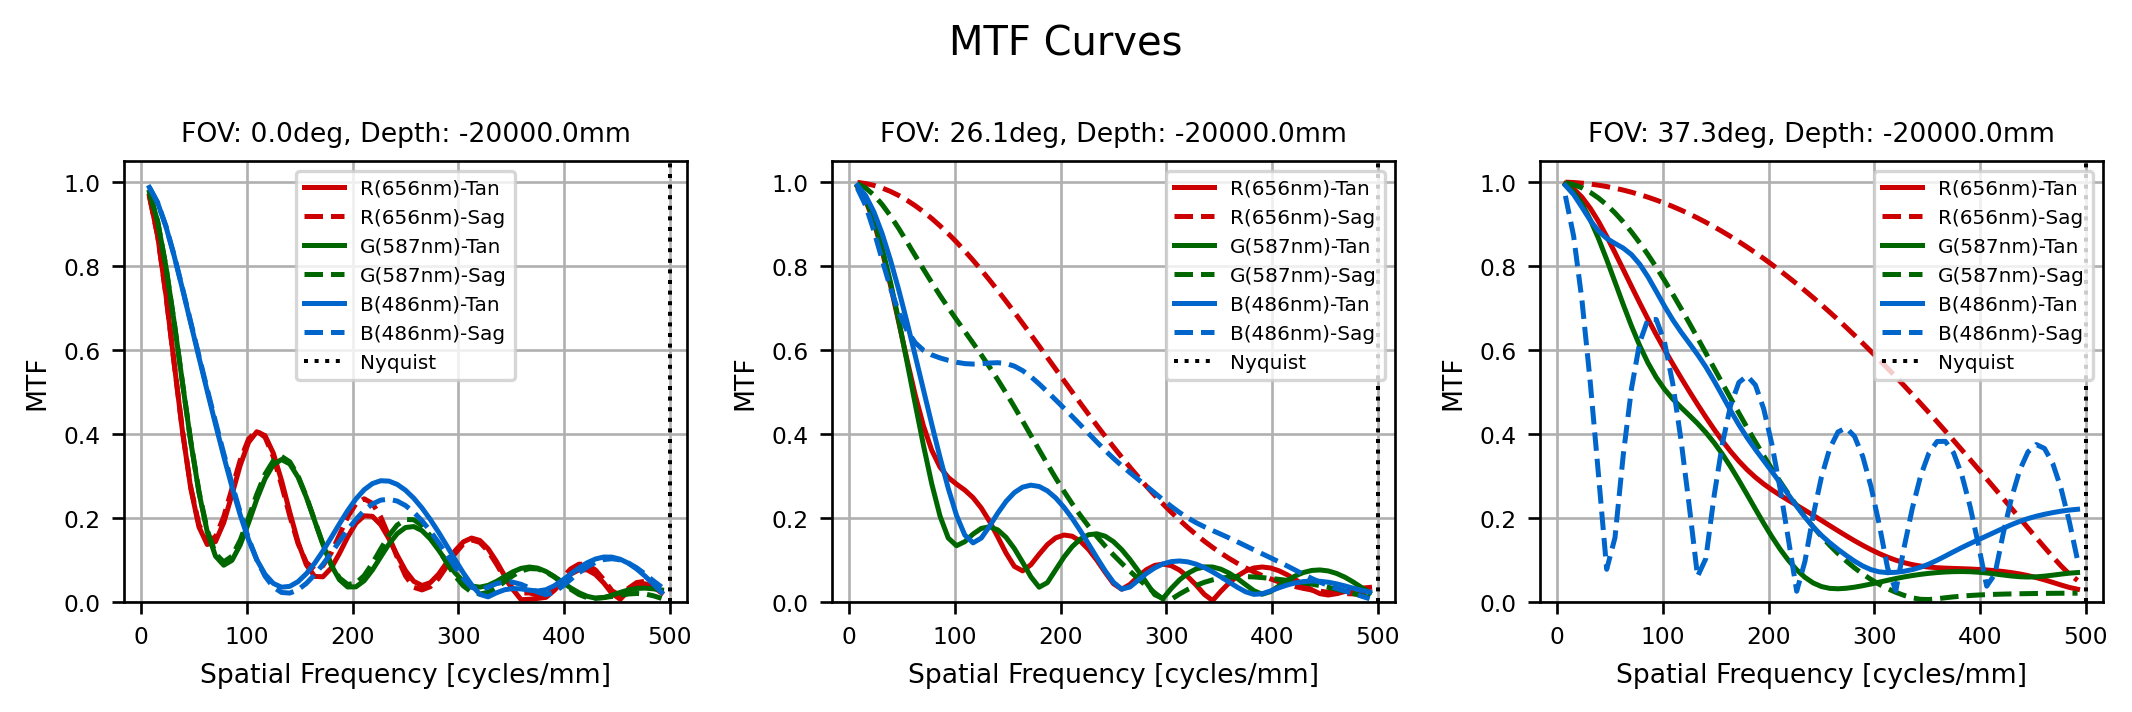

Ray spot analysis results for depth inf:
RMS radius: FoV (0.0) 5.588 um, FoV (0.5) 4.329 um, FoV (1.0) 5.503 um
Geo radius: FoV (0.0) 11.156 um, FoV (0.5) 11.482 um, FoV (1.0) 19.527 um


In [2]:
lens = GeoLens(filename="./datasets/lenses/cellphone/cellphone80deg.json", dtype=torch.float64)
lens.set_sensor_res(sensor_res=[4000, 4000])

lens.analysis(show=True)


#### Calculate Pupil Field (Wavefront)

Calculate the wavefront for a point object located at `[0.0, 0.0, -10000.0]` (far away from the lens). We use a high number of samples per pixel (spp=10000000) for accuracy.


In [3]:
# Calculate wavefront
wavefront, _ = lens.pupil_field(
    point=torch.tensor([0.0, 0.0, -10000.0]), spp=10000000
)

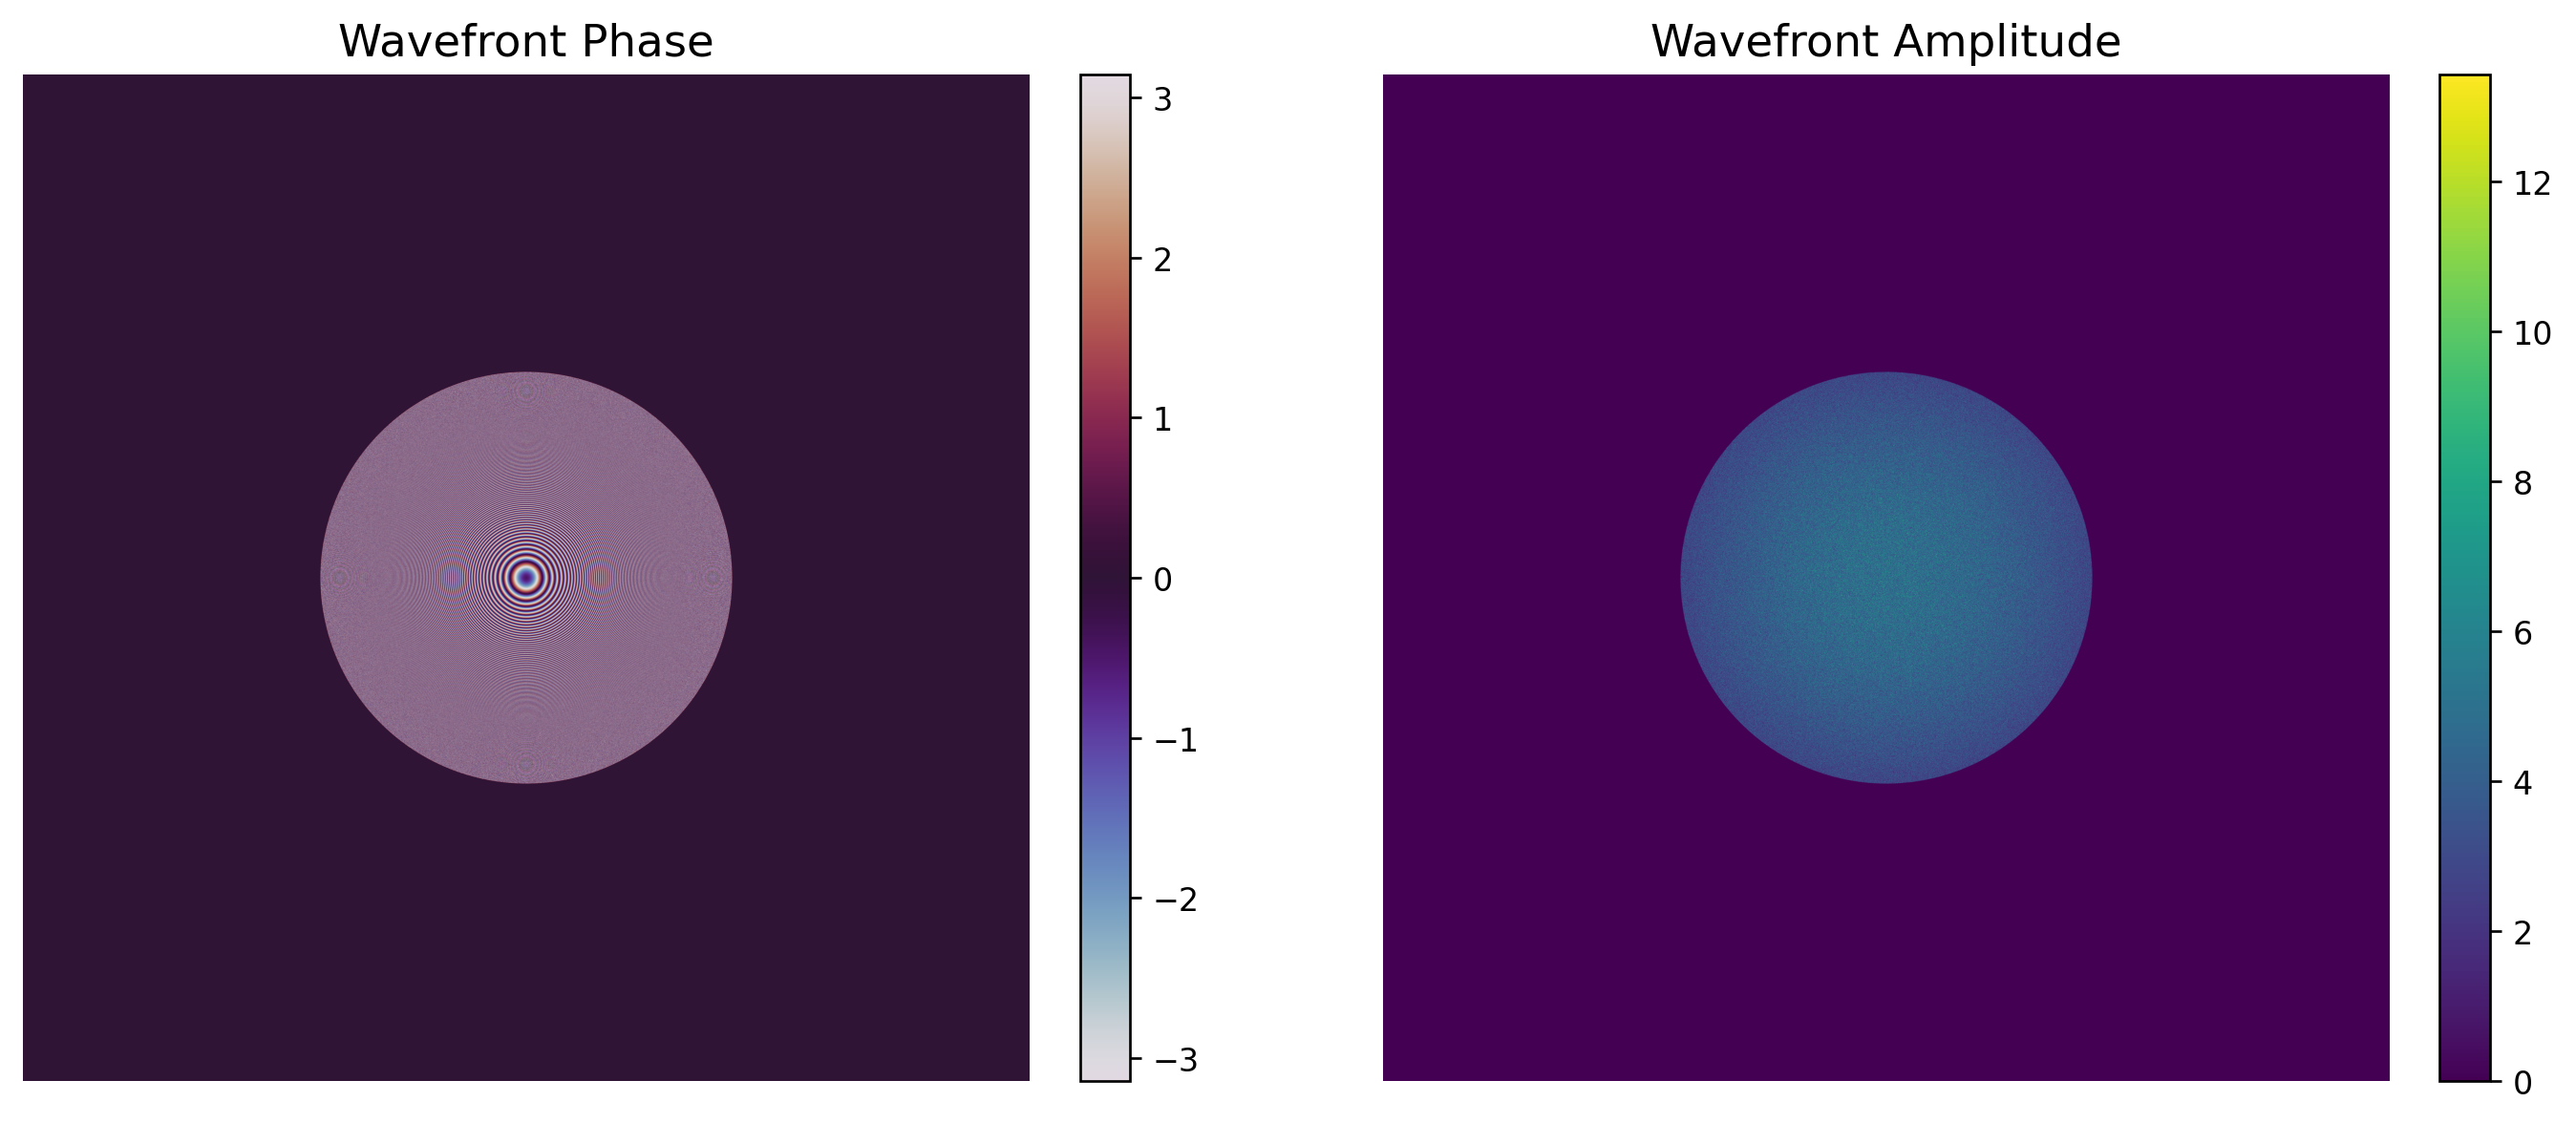

In [4]:
# Plot wavefront phase and amplitude
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Wavefront phase
phase = wavefront.angle().squeeze().cpu().numpy()
im1 = axes[0].imshow(phase, cmap='twilight')
axes[0].set_title('Wavefront Phase', fontsize=14)
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Wavefront amplitude
amplitude = torch.abs(wavefront).squeeze().cpu().numpy()
im2 = axes[1].imshow(amplitude, cmap='viridis')
axes[1].set_title('Wavefront Amplitude', fontsize=14)
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


#### Compare Coherent and Incoherent PSFs

Now let's compare the Point Spread Functions (PSF) calculated using coherent (exit-pupil diffraction method) and incoherent (ray tracing) methods for the same point object.


In [5]:
# PSF at default wavelength
psf_coherent = lens.psf_coherent(torch.tensor([0.0, 0.0, -10000.0]), ks=64)
psf_incoherent = lens.psf(torch.tensor([0.0, 0.0, -10000.0]), ks=64)

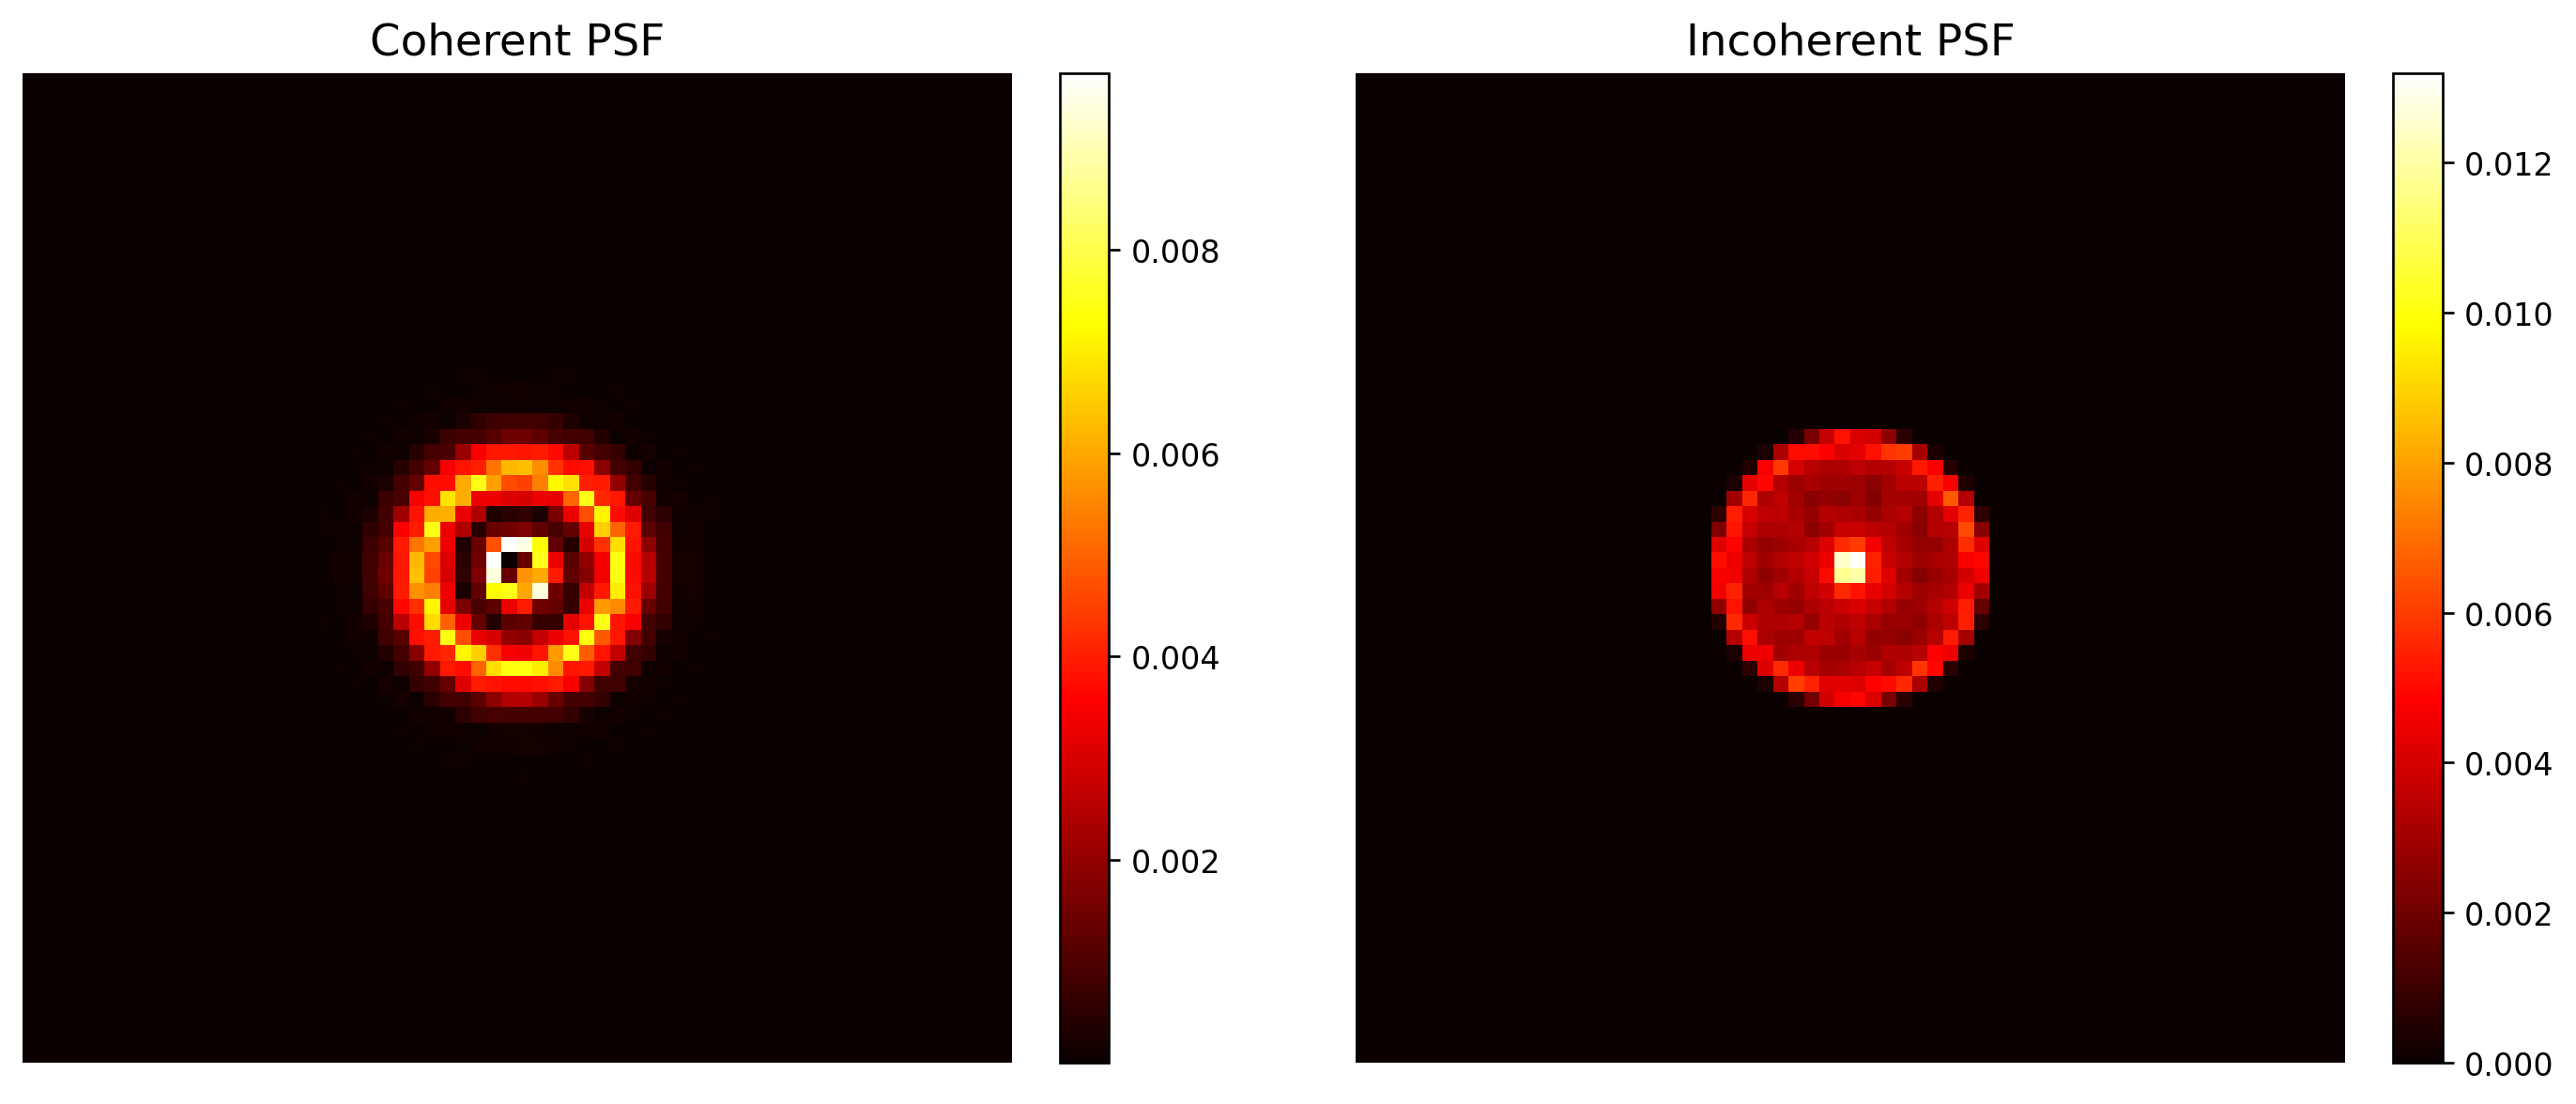

In [6]:
# Plot coherent and incoherent PSFs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Coherent PSF
psf_coh = psf_coherent.squeeze().cpu().numpy()
im1 = axes[0].imshow(psf_coh, cmap='hot')
axes[0].set_title('Coherent PSF', fontsize=14)
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Incoherent PSF
psf_incoh = psf_incoherent.squeeze().cpu().numpy()
im2 = axes[1].imshow(psf_incoh, cmap='hot')
axes[1].set_title('Incoherent PSF', fontsize=14)
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


#### Summary

This notebook demonstrated:

1. **Wavefront Calculation**: Computed the pupil field (wavefront) for a point object using coherent ray tracing
   - **Wavefront Phase**: Shows the phase distribution of the wavefront
   - **Wavefront Amplitude**: Shows the amplitude distribution of the wavefront

2. **PSF Comparison**: Compared coherent vs incoherent Point Spread Functions
   - **Coherent PSF**: PSF calculated using coherent wave-optics methods
   - **Incoherent PSF**: PSF calculated using incoherent/geometrical optics methods

The difference between coherent and incoherent PSFs illustrates the importance of wave-optics modeling for accurate lens simulation. All visualizations are displayed inline for easy comparison.
